# Notebook dedicated to study the found background events to solar candidates. This includes coincidence events, Hotspots and atmospherics.

In [10]:
import pickle
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import seaborn as sn

# Load data

In [11]:
# Data directory pattern
main_dir = '/home/joankl/data/solars/real_data/bisMSB/bkg_candidates/Analysis*/'

# Dictionary name list to load
dict_name_list = ['hs_dict', 'atm_dict', 'prompt_coinc_dict', 'delay_coinc_dict']

# Create an general empty dictionary to save the loaded dictionaries with names of dict_name_list
general_dict = {}

# Create a list with the dictionaries to be iterated
#dict_list = [hs_dict, atm_dict, prompt_coinc_dict, delay_coinc_dict]

# Iterate over each dictionary
for dict_name_list_i in dict_name_list:

    # Create list of directories for the dict_i
    file_dir_list = glob.glob(main_dir + dict_name_list_i + '.pkl')

    # Create temporal dictionary to save the data in file_dir_list. Only refresh when dict_i changes
    temp_dir = {}

    add_dict_key_ctrl = 0  # Counter to controls when keys are added to temp_dir.

    # Iterare over the directory files
    for fdir_i in file_dir_list:
        
        with open(fdir_i, 'rb') as f:
            dict_i = pickle.load(f)

        # Add the keys of dict_i to temp_dir. It will create the keys of the loaded dictionary one time since add_dict_key_ctrl will be > 0.
        if add_dict_key_ctrl == 0:
            dict_keys = list(dict_i.keys())
            for key_i in dict_keys:
                temp_dir[key_i] = []
            
            add_dict_key_ctrl += 1

        # Append the values of the loaded dict_i to the tempo dict
        for key_i in dict_keys:
            temp_dir[key_i].append(dict_i[key_i])

        # Once the file_dir_list is fully iterated, create the genara_dict keys and save the temp_dir informarion
        general_dict[dict_name_list_i] = temp_dir

## Atmospheric and HS Results

In [28]:
hs_dict = general_dict['hs_dict']
atm_dict = general_dict['atm_dict']


hs_counter = hs_dict['counter']
atm_counter = atm_dict['counter']

total_hs = int(np.sum(hs_counter))
total_atm = int(np.sum(atm_counter))

## Coincidence Analysis Observables

In [30]:
prompt_coinc_dict = general_dict['prompt_coinc_dict']
delay_coinc_dict = general_dict['delay_coinc_dict']

energy_prompt = [x for sublist in prompt_coinc_dict['energy'] for x in sublist]
time_prompt = [x for sublist in prompt_coinc_dict['time'] for x in sublist]
posx_prompt = [x for sublist in prompt_coinc_dict['posx'] for x in sublist]
posy_prompt = [x for sublist in prompt_coinc_dict['posy'] for x in sublist]
posz_prompt = [x for sublist in prompt_coinc_dict['posz'] for x in sublist]

energy_delay = [x for sublist in delay_coinc_dict['energy'] for x in sublist]
time_delay = [x for sublist in delay_coinc_dict['time'] for x in sublist]
posx_delay = [x for sublist in delay_coinc_dict['posx'] for x in sublist]
posy_delay = [x for sublist in delay_coinc_dict['posy'] for x in sublist]
posz_delay = [x for sublist in delay_coinc_dict['posz'] for x in sublist]


dt = np.array(time_delay) - np.array(time_prompt)

dx = np.array(posx_delay) - np.array(posx_prompt)
dy = np.array(posy_delay) - np.array(posy_prompt)
dz = np.array(posz_delay) - np.array(posz_prompt)
dr = np.sqrt(dx**2 + dy**2 + dz**2)

# Plots of Observables

In [150]:
def set_ticks(ax, minor_loc, max_loc):
    '''
    Function plot minor ticks in a given axis plot
    '''
    # ---- X axis ----
    ax.xaxis.set_minor_locator(MultipleLocator(minor_loc))
    ax.xaxis.set_major_formatter(ScalarFormatter(max_loc))

    # ---- Y axis ----
    #ax.yaxis.set_minor_locator(MultipleLocator(5))
    #ax.yaxis.set_major_formatter(ScalarFormatter())

    # ---- Show ticks on all sides ----
    ax.tick_params(which='minor', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='major', top=True, bottom=True, left=True, right=True)

## Titles and Style

In [151]:
# ======= Font Style =======

font_style_title = {'family':'serif','color':'black','fontsize':12}
font_style_axis = {'family':'serif', 'weight': 'normal','color':'black','size':11}

font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=9)

# ======= Sup. plot titles =======

# ------- Define the cuts of the analysis -------

# Cuts overall dataset
E_cut = 1.0
r_cut = 5.5
nhits_cut = 20

# cuts of the atmospheric rejection analysis

atm_nhits_cut = 3000
atm_time_cut = 20

# Cuts of the coincidence analysis
E_prompt_inf_cut = 1.0
E_prompt_sup_cut = 8.0

E_delay_inf_cut = 1.0
E_delay_sup_cut = 4.0

dt_inf_cut = 0.5
dt_sup_cut = 1000

dr_inf_cut = 0 
dr_sup_cut = 2500

dataset_title = rf'bisMSB Data Coincidence Analysis - runID: [354099, 371216], nhits $\geq$ {nhits_cut}, E > {E_cut} (MeV), R $\leq$ {r_cut} (m)'
atm_title = rf'Atmospheric rejection with cuts: if nhits $\geq$ {atm_nhits_cut} remove {atm_time_cut} s of data.'
coinc_title = rf'Coincidence Analysis with cuts: E$_\text{{prompt}}$ = [{E_prompt_inf_cut}, {E_prompt_sup_cut}] (MeV), E$_\text{{delay}}$ = [{E_delay_inf_cut}, {E_delay_sup_cut}] (MeV), $\Delta$t = [{dt_inf_cut}, {dt_sup_cut}] ($\mu$s), $\Delta$r = [{dr_inf_cut}, {dr_sup_cut}] (mm)'

## Energy

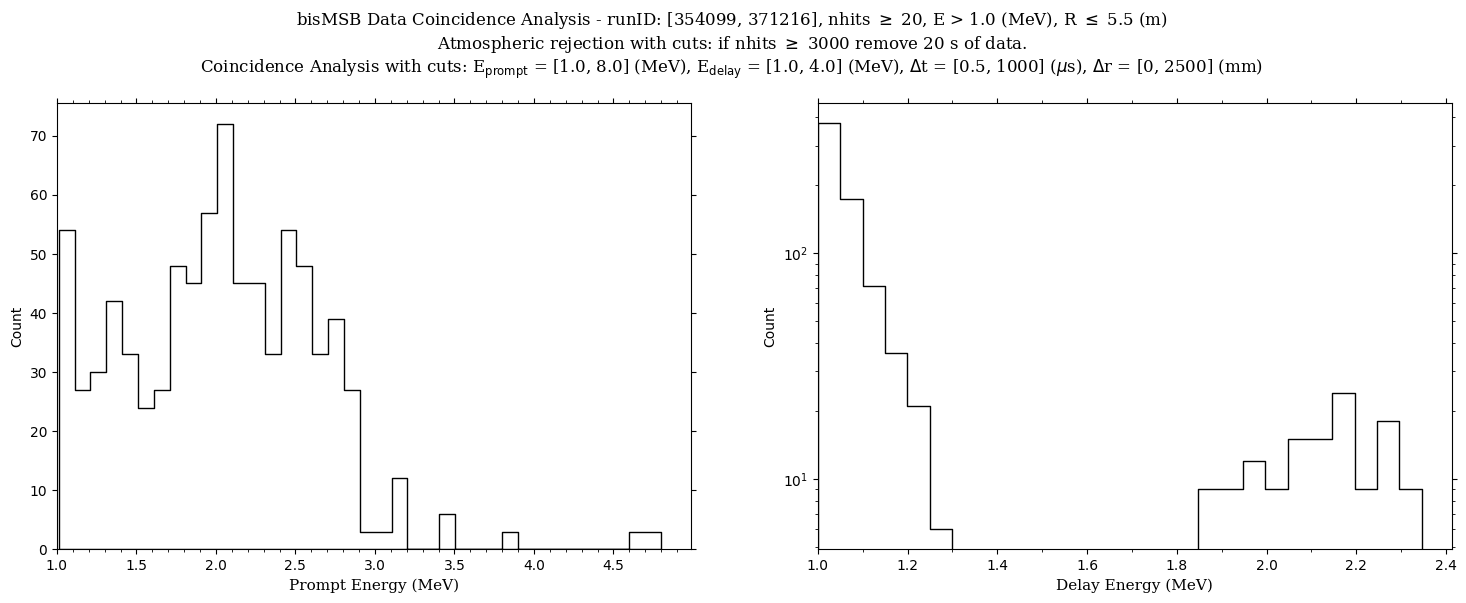

In [164]:
binwidth_prompt = 0.1
binwidth_delay = 0.05

fig, axes = plt.subplots(1, 2,  figsize=(18, 5.8))

sn.histplot(energy_prompt, ax = axes[0], binwidth = binwidth_prompt, color = 'black', element = 'step', alpha = 0)
sn.histplot(energy_delay, ax = axes[1], binwidth = binwidth_delay, color = 'black', element = 'step', alpha = 0)

axes[0].set_xlabel('Prompt Energy (MeV)', fontdict = font_style_axis)
#axes[0].set_yscale('log')
axes[0].set_xlim(E_prompt_inf_cut,)

axes[1].set_xlabel('Delay Energy (MeV)', fontdict = font_style_axis)
axes[1].set_yscale('log')
axes[1].set_xlim(E_delay_inf_cut,)

set_ticks(axes[0], minor_loc = 0.1, max_loc = 1)
set_ticks(axes[1], minor_loc = 0.1, max_loc = 1)

plt.suptitle(dataset_title  + '\n' + atm_title + '\n' + coinc_title, fontdict = font_style_title, y = 1.04)

plt.show()

# $\Delta$t and $\Delta$r

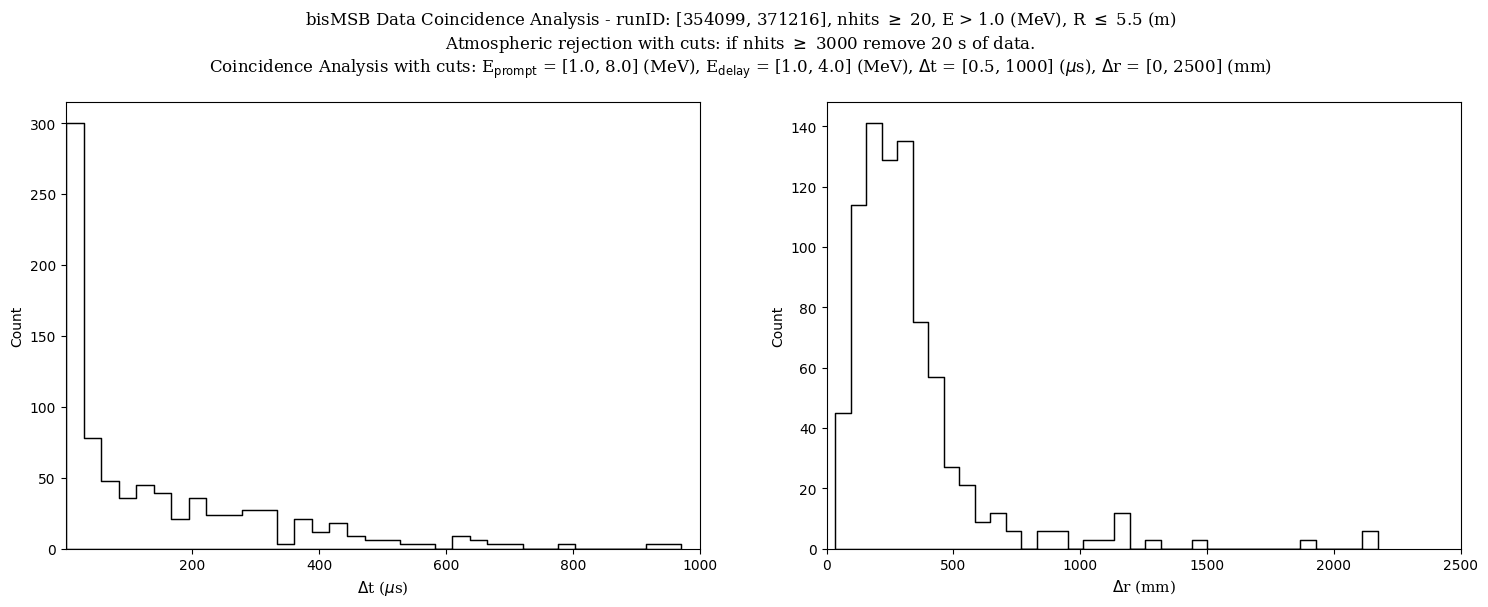

In [179]:
bins_t = 35
bins_r = 35

linewidth = 1.05

fig, axes = plt.subplots(1, 2,  figsize=(18, 5.8))

sn.histplot(dt, bins = bins_t, ax = axes[0], color = 'black', alpha = 0.0, element = 'step', linewidth = linewidth)
sn.histplot(dr, bins = bins_r, ax = axes[1], color = 'black', alpha = 0.0, element = 'step' , linewidth = linewidth)

axes[0].set_xlabel(r'$\Delta$t ($\mu$s)', fontdict = font_style_axis)
axes[0].set_xlim(dt_inf_cut, dt_sup_cut)

axes[1].set_xlabel(r'$\Delta$r (mm)', fontdict = font_style_axis)
axes[1].set_xlim(dr_inf_cut, dr_sup_cut)

#set_ticks(axes[0], minor_loc = 100, max_loc = 50)
#set_ticks(axes[1], minor_loc = 100, max_loc = 50)

plt.suptitle(dataset_title  + '\n' + atm_title + '\n' + coinc_title, fontdict = font_style_title, y = 1.04)

plt.show()